In [ ]:
import os
from google.colab import files
uploaded = files.upload()
print(os.getcwd())

Saving student_percentage_based on the number of study hours. - Sheet1.csv to student_percentage_based on the number of study hours. - Sheet1.csv
/content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("student_percentage_based on the number of study hours. - Sheet1.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**Ploting the scatter plot from this data**

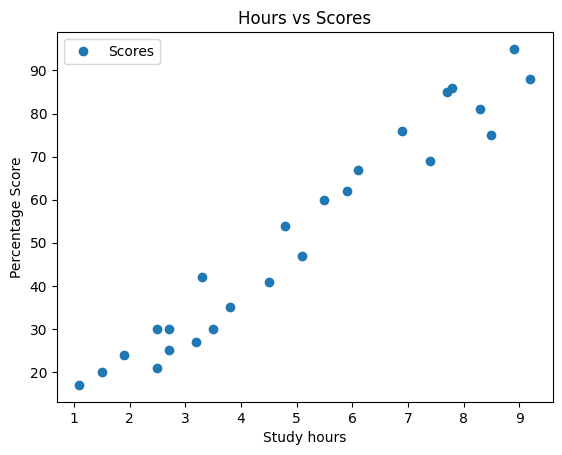

In [ ]:
df.plot(x="Hours", y ="Scores", style='o')
plt.title("Hours vs Scores")
plt.xlabel("Study hours")
plt.ylabel("Percentage Score")
plt.show()

**Creating the training and the testing data sets**

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [ ]:
Regression =  LinearRegression()
Regression.fit(X_train, y_train)
print("Training complted")

Training complted


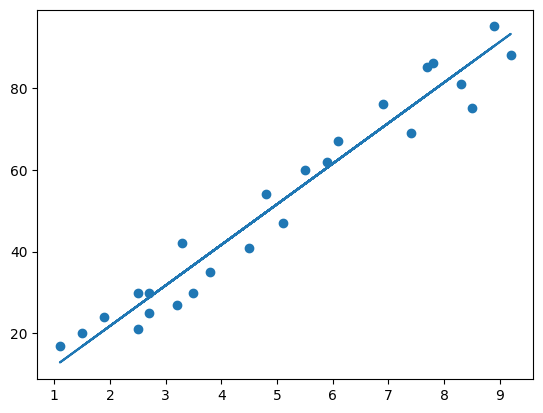

In [ ]:
Regre_line = Regression.coef_*X+Regression.intercept_
plt.scatter(X,y)
plt.plot(X, Regre_line)
plt.show()

**Now let's make prediction of the data**

In [ ]:
print(X_test)
y_predict = Regression.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing the actual and the predicted values from the data**

In [ ]:
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
df_comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be the predicted Score if the student studies for 9.25 hours/day ?**

In [ ]:
hours = 9.25
# Reshape the input to a 2D array
hours_2d = np.array(hours).reshape(1, -1)

predict_score = Regression.predict(hours_2d)
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_score[0]))


No. of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluating the Model

**The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithm perform on the perticular dataset. For simplicity here, we have chosen as mean square error. There are many such matrics**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 4.183859899002982
